In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from detect_class import detect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.070870

Saving images:
(0) Image: 'data/custom/images/train.jpg'


<Figure size 432x288 with 0 Axes>

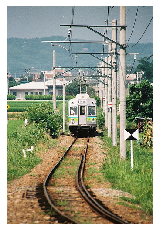

In [43]:
detect(image_folder="data/custom/images",
       weights_path="checkpoints/yolov3_ckpt_99.pth",
       model_def="config/yolov3-custom.cfg",
       class_path="data/custom/classes.names")


Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.065171
	+ Batch 1, Inference Time: 0:00:00.365076
	+ Batch 2, Inference Time: 0:00:00.206996
	+ Batch 3, Inference Time: 0:00:00.105825
	+ Batch 4, Inference Time: 0:00:00.090758

Saving images:
(0) Image: '../data/1.jpg'
[tensor(223.1129), tensor(6.7522), tensor(325.3947), tensor(106.5113), tensor(0.9999), tensor(0.9999), tensor(11.)]
	+ Label: stop sign, Conf: 0.99990


<Figure size 432x288 with 0 Axes>

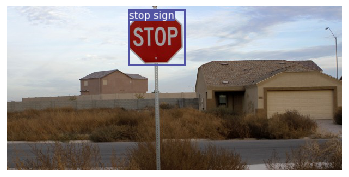

(1) Image: '../data/eric-caitlin-swaggin.jpg'
[tensor(906.1335), tensor(411.3256), tensor(1704.6406), tensor(2031.9136), tensor(0.9996), tensor(1.0000), tensor(0.)]
	+ Label: person, Conf: 0.99996
[tensor(182.7525), tensor(229.8626), tensor(454.6055), tensor(672.1653), tensor(0.9789), tensor(0.9997), tensor(0.)]
	+ Label: person, Conf: 0.99965
[tensor(461.3955), tensor(221.3536), tensor(713.9172), tensor(658.1493), tensor(0.9723), tensor(0.9998), tensor(0.)]
	+ Label: person, Conf: 0.99977
[tensor(705.4349), tensor(141.0987), tensor(963.2961), tensor(713.6279), tensor(0.9530), tensor(0.9996), tensor(0.)]
	+ Label: person, Conf: 0.99960


<Figure size 432x288 with 0 Axes>

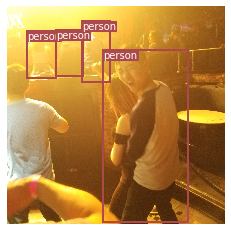

(2) Image: '../data/parque-bench.jpg'
[tensor(840.2921), tensor(675.0703), tensor(1371.0658), tensor(1829.0845), tensor(0.9955), tensor(0.9991), tensor(0.)]
	+ Label: person, Conf: 0.99906
[tensor(404.7840), tensor(176.8052), tensor(768.7782), tensor(818.2820), tensor(0.9883), tensor(1.0000), tensor(0.)]
	+ Label: person, Conf: 0.99999
[tensor(86.6739), tensor(558.9831), tensor(699.6055), tensor(1951.4440), tensor(0.9822), tensor(1.0000), tensor(0.)]
	+ Label: person, Conf: 0.99998
[tensor(1512.9133), tensor(274.1076), tensor(1711.5004), tensor(681.1536), tensor(0.9797), tensor(0.9999), tensor(0.)]
	+ Label: person, Conf: 0.99992
[tensor(1311.6100), tensor(597.0768), tensor(1830.8187), tensor(1808.3757), tensor(0.9733), tensor(0.9998), tensor(0.)]
	+ Label: person, Conf: 0.99985
[tensor(1089.1018), tensor(245.8947), tensor(1567.2577), tensor(834.3837), tensor(0.9677), tensor(0.9996), tensor(0.)]
	+ Label: person, Conf: 0.99958
[tensor(130.5483), tensor(224.1055), tensor(465.6448), tens

<Figure size 432x288 with 0 Axes>

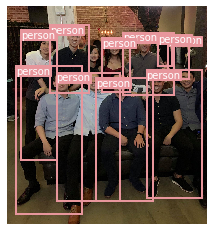

(3) Image: '../data/stop_1330545910.avi_image0.png'
[tensor(180.5276), tensor(237.2507), tensor(378.2676), tensor(317.4264), tensor(0.9987), tensor(0.9339), tensor(2.)]
	+ Label: car, Conf: 0.93391


<Figure size 432x288 with 0 Axes>

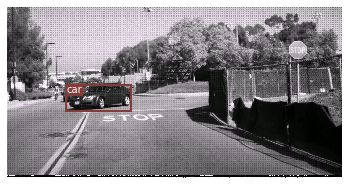

(4) Image: '../data/stop_1330546043.avi_image0.png'
[tensor(43.4862), tensor(231.9290), tensor(309.8531), tensor(378.6447), tensor(0.9984), tensor(0.9921), tensor(2.)]
	+ Label: car, Conf: 0.99213
[tensor(549.3550), tensor(234.9346), tensor(632.4224), tensor(307.4521), tensor(0.9963), tensor(0.9779), tensor(2.)]
	+ Label: car, Conf: 0.97790


<Figure size 432x288 with 0 Axes>

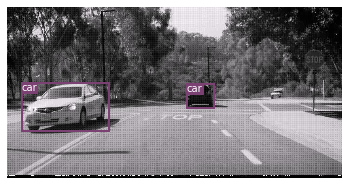

In [42]:
detect(image_folder="../data")

Text(136.186087725, 204.2830575, 'train')

<Figure size 432x288 with 0 Axes>

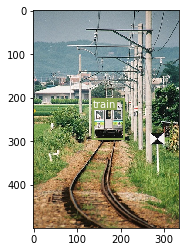

In [47]:
import cv2
import matplotlib.patches as patches
import random
image_path = 'data/custom/images/train.jpg'
label_path = 'data/custom/labels/train.txt'

from collections import namedtuple

Label = namedtuple('Label', ['label_idx', 'x_center', 'y_center', 'width', 'height'])


image = cv2.imread(image_path)
with open(label_path) as f:
    label = f.read()
    label = label.strip()
    label = label.split(' ')
    label = [float(string) for string in label]
    label = Label(*label)
    
plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# Bounding-box colors
cmap = plt.get_cmap("tab20b")
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
bbox_colors = random.sample(colors, 10)
color = bbox_colors[0]

height, width, _ = image.shape

x1 = (label.x_center - label.width / 2) * width
y1 = (label.y_center - label.height / 2) * height

box_w = label.width * width
box_h = label.height * height

# Create a Rectangle patch
bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor=color, facecolor="none")
# Add the bbox to the plot
ax.add_patch(bbox)

plt.text(
    x1,
    y1,
    s='train',
    color="white",
    verticalalignment="top",
    bbox={"color": color, "pad": 0},
)

In [45]:
label

Label(label_idx=0.0, x_center=0.515, y_center=0.5, width=0.21694873, height=0.18286777)

In [40]:
height, width

(500, 335)